# AMR-Wind simulation post-processing & analysis 
# -- Flow Field --

## Import necessary functions

In [1]:
# Add any possible locations of submodules here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend',
                 '/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                '/home/jfrederi/projects/amrwind-frontend'
                '/home/jfrederi/projects/moa_python']
import sys, os, shutil, scipy, pandas
for x in amrwindfedirs: sys.path.insert(1, x)

import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as ncdf
import pandas as pd
import os
%matplotlib inline
from scipy.optimize import curve_fit

from moa_python.post_plane import Post_plane

### Set data folder(s)

In [2]:
base_folder = '/projects/ssc/jfrederi/amr-wind-runs/snl_precursors/medWS_lowTI'
case_folder = ['baseline_full','ccwhelix_St03_A40']
suffix = "post_processing"
for case in case_folder:
    plane_folder = os.path.join(base_folder, case, suffix)
    available_planes = [(i) for i in os.listdir(plane_folder) if i.endswith(".nc") & ~i.startswith("abl")]
    print(f"Case '{case}' contains the following planes: \n{available_planes}")

Case 'baseline_full' contains the following planes: 
['XZdomaincoarse_68125.nc', 'YZwake_68125.nc', 'XZ_68125.nc', 'XY_68125.nc', 'YZinflow_68125.nc', 'XYdomaincoarse_68125.nc', 'YZcoarse_68125.nc']
Case 'ccwhelix_St03_A40' contains the following planes: 
['XZdomaincoarse_68125.nc', 'YZwake_68125.nc', 'XZ_68125.nc', 'XY_68125.nc', 'YZinflow_68125.nc', 'XYdomaincoarse_68125.nc', 'YZcoarse_68125.nc']


### Import planes of interest

In [3]:
## Choose planes to load
hor_plane_file = 'XY_68125.nc'
ver_plane_file = 'YZwake_68125.nc'

## Settings
sampling_freq = 10
Ncases = len(case_folder)

## Load planes
hor_plane = []
ver_plane = []
for n in range(Ncases):
    plane_folder = os.path.join(base_folder, case_folder[n], suffix)
    hor_plane.append(Post_plane(os.path.join(plane_folder, hor_plane_file), freq = sampling_freq))
    ver_plane.append(Post_plane(os.path.join(plane_folder, ver_plane_file), freq = sampling_freq))

Plane has 5 plane(s) in 241 time steps from 27250.0 to 28450.0
Plane offsets: [ 30. 150. 270. 390. 510.]
Plane has 22 plane(s) in 241 time steps from 27250.0 to 28450.0
Plane offsets: [1224. 1224. 1260. 1320. 1380. 1440. 1500. 1560. 1680. 1800. 1920. 2040.
 2160. 2400. 2640. 2880. 3120. 3360. 3600. 3840. 4080. 4320.]
Plane has 5 plane(s) in 241 time steps from 27250.0 to 28450.0
Plane offsets: [ 30. 150. 270. 390. 510.]
Plane has 22 plane(s) in 241 time steps from 27250.0 to 28450.0
Plane offsets: [1224. 1224. 1260. 1320. 1380. 1440. 1500. 1560. 1680. 1800. 1920. 2040.
 2160. 2400. 2640. 2880. 3120. 3360. 3600. 3840. 4080. 4320.]


### Plot horizontal plane (average and instantaneous)

Plotting u mean velocity for plane at location 150
Nearest point to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 27744.377067309888 is 27745.000000039814
Nearest time to 28450.000000055203 is 28450.000000055203
Plotting u mean velocity for plane at location 150
Nearest point to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 27744.377067309888 is 27745.000000039814
Nearest time to 28450.000000055203 is 28450.000000055203


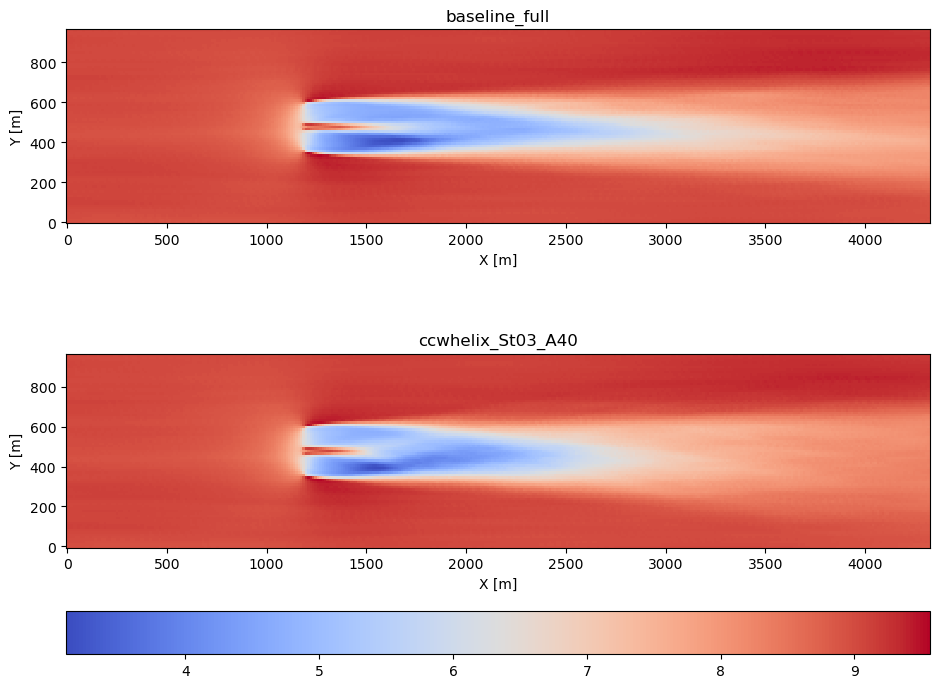

In [4]:
## Set parameters
D = 240
St = 0.3
U = 9.07
helix_period = D/(St*U)
timespan = 8*helix_period
hub_height = 150
turbine_hor_location = [1200, 480, hub_height]

## Set figure
fig, axes = plt.subplots(Ncases,1,figsize = (9.5,8), tight_layout=True)
if not isinstance(axes, (list, np.ndarray)): axes = [axes]
plt.set_cmap('coolwarm')

## Plot subfigures for all cases
for n in range(Ncases):
    tend = hor_plane[n].time[-1]
    hor_plane[n].plot_mean_plane(hub_height, ax = axes[n], timespan = [tend-timespan,tend])
    axes[n].set_title(case_folder[n])
    
    # Remove colorbar from subplots
    im = [obj for obj in axes[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if hasattr(im,'colorbar') and im.colorbar is not None:
        im.colorbar.remove()
fig.colorbar(im,ax = axes[n],location='bottom')

Plotting u velocity for plane at location 150 at time 28200
Nearest point to 150 is 150.0
Nearest time to 28200 is 28200.000000049746
Returning u velocity plane for slice at 150.0 at time 28200.000000049746
Plotting u velocity for plane at location 150 at time 28200
Nearest point to 150 is 150.0
Nearest time to 28200 is 28200.000000049746
Returning u velocity plane for slice at 150.0 at time 28200.000000049746


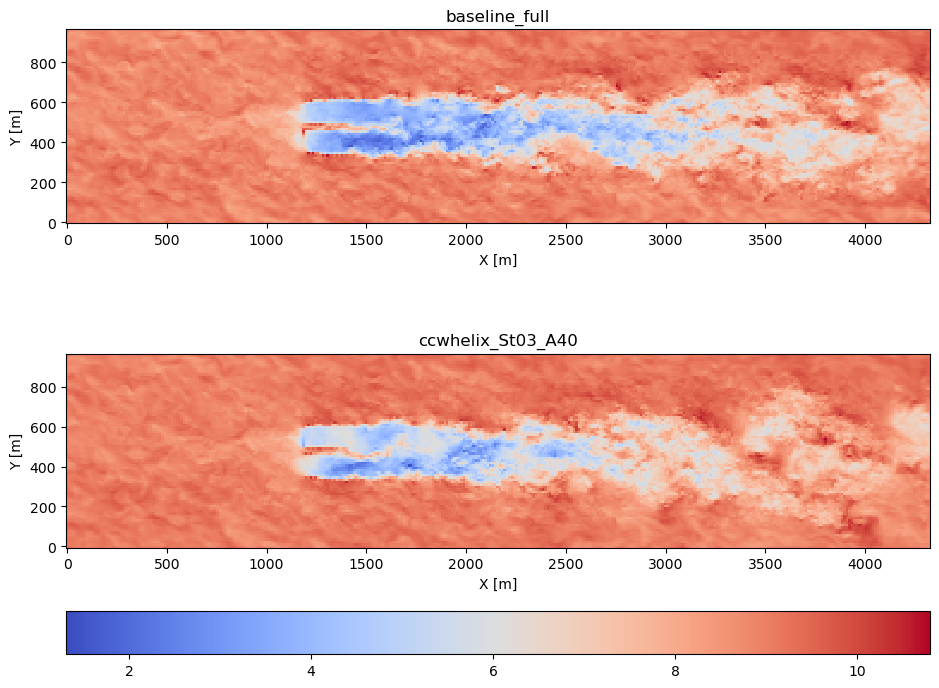

In [5]:
## Select time instance to plot
time_instance = 28200

## Set figure
fig, axes = plt.subplots(Ncases,1,figsize = (9.5,8), tight_layout=True)
if not isinstance(axes, (list, np.ndarray)): axes = [axes]
plt.set_cmap('coolwarm')

## Plot subfigures for all cases
for n in range(Ncases):
    tend = hor_plane[n].time[-1]
    hor_plane[n].plot_plane(hub_height, ax = axes[n], time = time_instance)
    axes[n].set_title(case_folder[n])
    
    # Remove colorbar from subplots
    im = [obj for obj in axes[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if hasattr(im,'colorbar') and im.colorbar is not None:
        im.colorbar.remove()
fig.colorbar(im,ax = axes[n],location='bottom')

### Plot average vertical planes

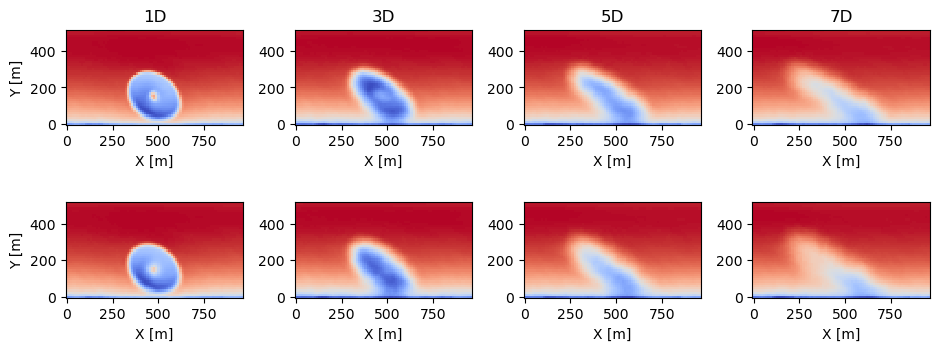

In [33]:
## Select planes to plot
downstream_distances = [1, 3, 5, 7]
planes_to_plot = np.array(downstream_distances)*D + turbine_hor_location[0]
Nplanes = len(planes_to_plot)

# Set up figure
fig, axes = plt.subplots(Ncases, Nplanes,figsize = (9.5,4), tight_layout=True)
if not isinstance(axes[0],(list,np.ndarray)): axes = [axes]
    
## Plot planes for all cases
for n in range(Ncases):
    for k in range(Nplanes):
        tend = ver_plane[n].time[-1]
        ver_plane[n].plot_mean_plane(planes_to_plot[k], timespan = [tend-timespan, tend], \
                                     ax = axes[n][k], verbose=False)
        if n == 0: axes[n][k].set_title(f'{downstream_distances[k]}D')
        im = [obj for obj in axes[n][k].get_children() if isinstance(obj, mpl.collections.Collection)][0]
        if hasattr(im,'colorbar') and im.colorbar is not None:
            im.colorbar.remove()
        if k > 0: axes[n][k].set_ylabel('')


## Velocity in wake

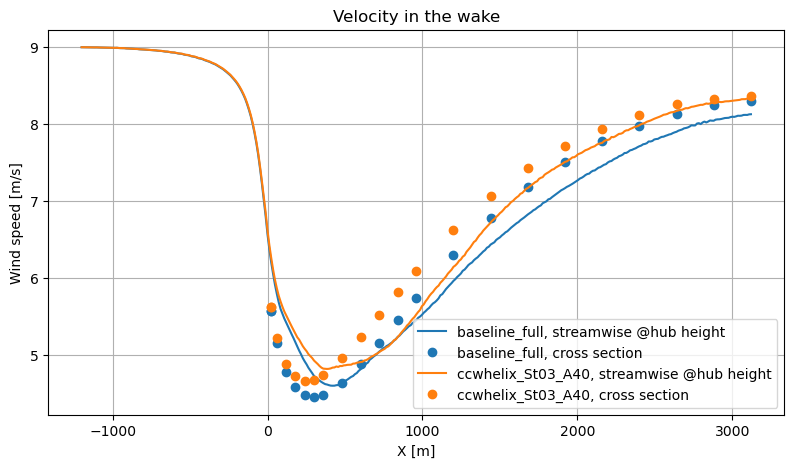

In [32]:
## Set location
turbine_ver_location = [480, 150, 1200]
fig_wake, ax_wake = plt.subplots(figsize=(9.5,5))
legend_string = []

for n in range(Ncases):
    color = 'C'+str(n)
    hor_plane[n].plot_vel_in_wake(D, turb_loc = [1200, 480, 150], timespan=[tend-timespan,tend], \
                                  ax = ax_wake, color = color, verbose = False)
    ver_plane[n].plot_vel_in_wake(D, turb_loc = [480, 150, 1200],\
                               timespan = [tend-timespan,tend], axis='z', ax = ax_wake, linestyle = 'o', color=color, verbose = False)
    legend_string += [f'{case_folder[n]}, streamwise @hub height',f'{case_folder[n]}, cross section']
ax_wake.legend(legend_string,loc='lower right')
ax_wake.set_title('Velocity in the wake');